# Name: Leah Ho

## Question 1: LRM with one independent variable

In [32]:
!pip install --upgrade yfinance==0.2.54
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#### Part 1: Use the yfinance library to download monthly Close Prices (from Yahoo Finance) for 5 stocks of your choice. Also download the S&P 500 Index data (market) and 13-week T-Bill (risk-free rate) data for the same date range, starting from January 1st, 2000 (or from the earliest date that data is available for your stocks).

In [39]:
info = yf.download(tickers = ['MSFT','AAPL','GOOGL','AMZN','TSLA','^GSPC','^IRX'], start = '2000-01-01', interval = '1mo')['Close']
info

[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOGL,MSFT,TSLA,^GSPC,^IRX
Date,,,,,,,
2000-01-01,0.780552,3.228125,NaN,30.054033,NaN,1394.459961,5.530
2000-02-01,0.862370,3.443750,NaN,27.443975,NaN,1366.420044,5.640
2000-03-01,1.021772,3.350000,NaN,32.625694,NaN,1498.579956,5.720
2000-04-01,0.933372,2.759375,NaN,21.417816,NaN,1452.430054,5.650
2000-05-01,0.631965,2.415625,NaN,19.210781,NaN,1420.599976,5.490
...,...,...,...,...,...,...,...
2024-11-01,236.808807,207.889999,168.756592,421.768372,345.160004,6032.379883,NaN
2024-12-01,250.144974,219.389999,189.083298,420.656525,403.839996,5881.629883,NaN
2025-01-01,235.740814,237.679993,204.020004,414.229431,404.600006,6040.529785,NaN


#### Part 2: Calculate the correlation matrix for your five stock return series and the market return.

In [41]:
returns = info.dropna().pct_change()
returns = returns[['MSFT','AAPL','GOOGL','AMZN','TSLA','^GSPC','^IRX']]
corr = returns.corr()
corr

Ticker,MSFT,AAPL,GOOGL,AMZN,TSLA,^GSPC,^IRX
Ticker,,,,,,,
MSFT,1.000000,0.483981,0.539342,0.475672,0.224926,0.628747,0.198844
AAPL,0.483981,1.000000,0.421506,0.490259,0.395033,0.629528,0.094536
GOOGL,0.539342,0.421506,1.000000,0.514542,0.215614,0.612916,0.150500
AMZN,0.475672,0.490259,0.514542,1.000000,0.325827,0.583801,0.188216
TSLA,0.224926,0.395033,0.215614,0.325827,1.000000,0.367845,-0.097978
^GSPC,0.628747,0.629528,0.612916,0.583801,0.367845,1.000000,0.114342
^IRX,0.198844,0.094536,0.150500,0.188216,-0.097978,0.114342,1.000000


#### Part 3: Visit this page to learn how to use seaborn to create a correlation heatmap. Plot your correlation matrix above as a correlation heatmap.

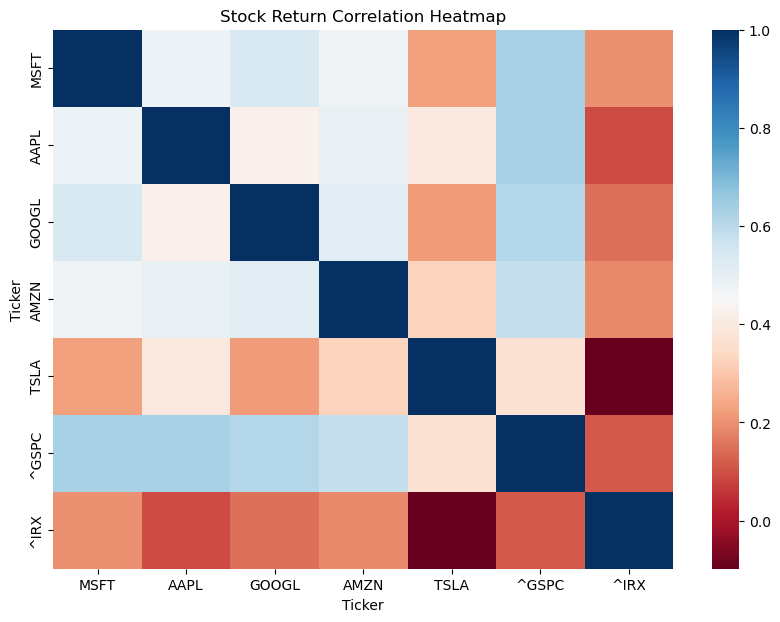

In [43]:
figure1 = plt.figure(figsize = (10,7))
sns.heatmap(corr, cmap = 'RdBu')
plt.title("Stock Return Correlation Heatmap")
plt.show()

#### Part 4: Estimate the linear regression model:

In [47]:
final = {}
stocks = ['MSFT','AAPL','GOOGL','AMZN','TSLA']

for stock in stocks:
    X = sm.add_constant(returns['^GSPC']) 
    Y = returns[stock]
    data = pd.concat([X, Y], axis=1).dropna()
    X_valid = data[['const', '^GSPC']]
    Y_valid = data[stock]
    model = sm.OLS(Y_valid, X_valid).fit()
    final[stock] = {'Alpha': model.params['const'], 'Beta': model.params['^GSPC'], 'Adj_R2': model.rsquared_adj}

final_df = pd.DataFrame(final).T
print(final_df)

          Alpha      Beta    Adj_R2
MSFT   0.010317  0.904427  0.391680
AAPL   0.010556  1.178956  0.392669
GOOGL  0.007447  1.014482  0.371905
AMZN   0.012062  1.188973  0.336852
TSLA   0.028099  1.620681  0.130101


#### Part 5: Construct a bar plot that shows graphically the alpha and beta of the stock and a line for the Adjusted R2 of the regression. The x-axis represents the stocks and the bar the magnitude of the alpha and beta. You can refer to a similar bar plot in your notes as an example.

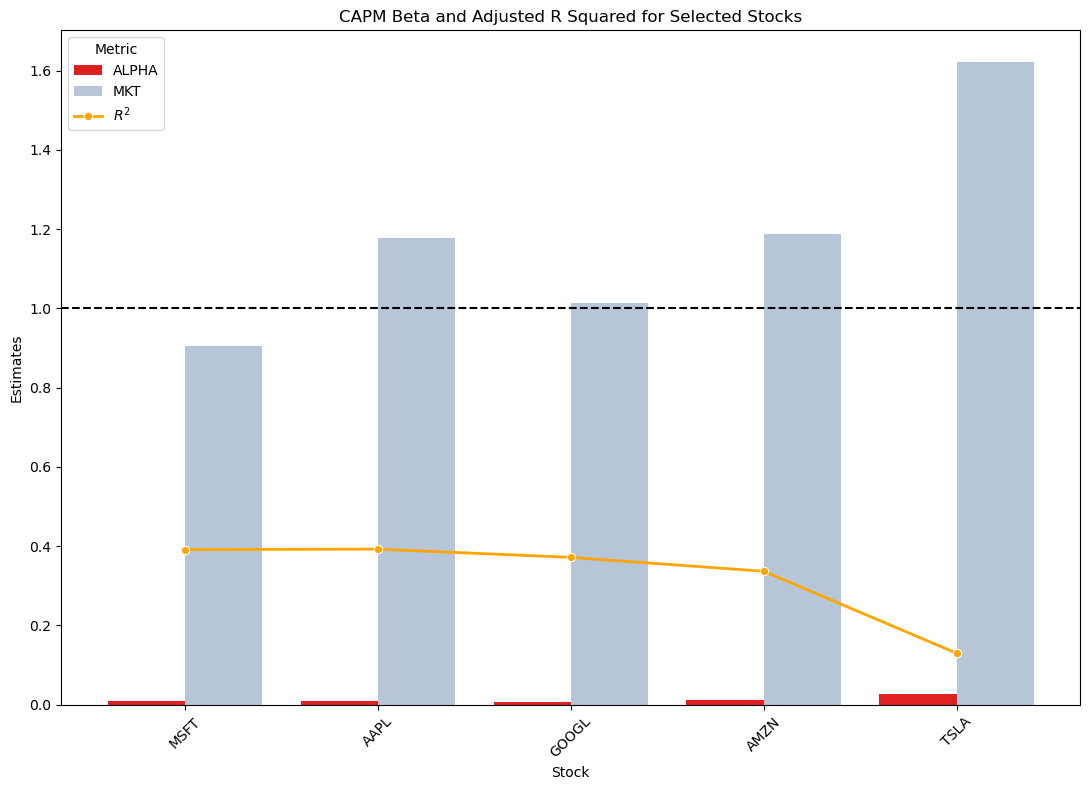

In [52]:
capm = pd.DataFrame(final).T
capm.reset_index(inplace=True)
capm.rename(columns={'index': 'Stock', 'Alpha': 'ALPHA', 'Beta': 'MKT', 'Adj_R2': 'R squared'}, inplace=True)
capm_long = capm.melt(id_vars="Stock", value_vars=['ALPHA', 'MKT'], var_name="Metric", value_name="Value")

fig, ax = plt.subplots(figsize=(11, 8))

sns.barplot(x='Stock', y='Value', hue='Metric', data=capm_long, palette=['red', 'lightsteelblue'],dodge=True, width=0.8)

sns.lineplot(x='Stock', y='R squared', data=capm, color="orange", marker="o", linewidth=2, label='$R^2$')

plt.axhline(y=1, linestyle="--", color="black")
plt.title('CAPM Beta and Adjusted R Squared for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Estimates')
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

## Question 2: Investment Style

#### Part 1: Download the file FUNDS.xlsx

In [59]:
info2 = pd.read_excel('/Users/macbookpro/Documents/DATA 201/FUNDS.xlsx', parse_dates=['Date'], index_col='Date')
info2

/var/folders/14/3w9hl13n6dj49wx5by1t5_kh0000gn/T/ipykernel_13102/1200371184.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  info2 = pd.read_excel('/Users/macbookpro/Documents/DATA 201/FUNDS.xlsx', parse_dates=['Date'], index_col='Date')


,Mkt-RF,SMB,HML,RF,FUND1,FUND2,FUND3,FUND4,FUND5,FUND6,FUND7
Date,,,,,,,,,,,
201302,1.29,-0.27,0.11,0.00,1.27,1.10,1.00,1.75,1.36,0.56,1.15
201303,4.03,0.81,-0.19,0.00,4.48,4.87,4.81,4.89,3.43,4.96,3.49
201304,1.55,-2.37,0.45,0.00,1.33,-0.79,-0.80,-1.09,2.27,-1.25,1.55
201305,2.80,1.71,2.63,0.00,4.13,5.18,5.14,5.39,2.30,5.60,2.61
201306,-1.20,1.33,0.03,0.00,-1.54,0.35,-0.34,-0.84,-1.78,0.00,-1.75
...,...,...,...,...,...,...,...,...,...,...,...
202408,1.61,-3.55,-1.13,0.48,1.30,-1.78,-1.06,-2.36,2.43,-0.94,3.34
202409,1.74,-0.17,-2.59,0.40,0.08,0.35,0.60,-0.35,1.81,1.72,1.59
202410,-0.97,-1.01,0.89,0.39,-0.19,-1.76,-1.18,-1.10,-0.62,-1.54,-0.73


#### Part 2: Replace the values in FUND1 to FUND7 with each fund’s excess return by subtracting the risk-free rate.

In [62]:
fund = ['FUND1', 'FUND2', 'FUND3', 'FUND4', 'FUND5', 'FUND6', 'FUND7']
info2[fund] = info2[fund].subtract(info2['RF'], axis=0)
info2.head()

,Mkt-RF,SMB,HML,RF,FUND1,FUND2,FUND3,FUND4,FUND5,FUND6,FUND7
Date,,,,,,,,,,,
201302,1.29,-0.27,0.11,0.0,1.27,1.10,1.00,1.75,1.36,0.56,1.15
201303,4.03,0.81,-0.19,0.0,4.48,4.87,4.81,4.89,3.43,4.96,3.49
201304,1.55,-2.37,0.45,0.0,1.33,-0.79,-0.80,-1.09,2.27,-1.25,1.55
201305,2.80,1.71,2.63,0.0,4.13,5.18,5.14,5.39,2.30,5.60,2.61
201306,-1.20,1.33,0.03,0.0,-1.54,0.35,-0.34,-0.84,-1.78,0.00,-1.75


#### Part 3: Use the Fama-French 3-factor model shown below to regress each fund’s excess return on the three factors (market, size, value). Generate a table to present the estimation results for the FamaFrench 3-factor model. You can refer to a similar table in your notes as an example.

In [65]:
info2 = info2.rename(columns={'Mkt-RF': 'MKT'})
info2

,MKT,SMB,HML,RF,FUND1,FUND2,FUND3,FUND4,FUND5,FUND6,FUND7
Date,,,,,,,,,,,
201302,1.29,-0.27,0.11,0.00,1.27,1.10,1.00,1.75,1.36,0.56,1.15
201303,4.03,0.81,-0.19,0.00,4.48,4.87,4.81,4.89,3.43,4.96,3.49
201304,1.55,-2.37,0.45,0.00,1.33,-0.79,-0.80,-1.09,2.27,-1.25,1.55
201305,2.80,1.71,2.63,0.00,4.13,5.18,5.14,5.39,2.30,5.60,2.61
201306,-1.20,1.33,0.03,0.00,-1.54,0.35,-0.34,-0.84,-1.78,0.00,-1.75
...,...,...,...,...,...,...,...,...,...,...,...
202408,1.61,-3.55,-1.13,0.48,0.82,-2.26,-1.54,-2.84,1.95,-1.42,2.86
202409,1.74,-0.17,-2.59,0.40,-0.32,-0.05,0.20,-0.75,1.41,1.32,1.19
202410,-0.97,-1.01,0.89,0.39,-0.58,-2.15,-1.57,-1.49,-1.01,-1.93,-1.12


In [68]:
size7 = info2[fund]

tablesize7 = pd.DataFrame({
    'AV RET': size7.mean(),
    'STD DEV': size7.std()
})

print(f"Average return and standard deviation of the decile portfolios sorted by size.\n\n{tablesize7.round(3)}")

Average return and standard deviation of the decile portfolios sorted by size.

       AV RET  STD DEV
FUND1   0.853    5.177
FUND2   0.905    5.959
FUND3   0.873    5.739
FUND4   0.904    6.516
FUND5   1.087    4.357
FUND6   0.919    5.600
FUND7   1.130    4.439


In [71]:
X = info2[['MKT','SMB','HML']]
X = sm.add_constant(X)  

factors_final = {}
factors_summary = {}
for portfolio in size7.columns:
    Y = size7[portfolio]
    a = sm.OLS(Y, X).fit()
    factors_final[portfolio] = a.params
    factors_summary[portfolio] = a.summary()

# Convert the results to a DataFrame and display with three decimal digits
factors_df = pd.DataFrame(factors_final).T.round(3)
print(factors_df)

       const    MKT    SMB    HML
FUND1 -0.218  1.062 -0.037  0.475
FUND2  0.017  0.974  0.773  0.450
FUND3 -0.086  1.018  0.661  0.379
FUND4 -0.058  1.067  0.689  0.676
FUND5 -0.009  1.004 -0.193  0.027
FUND6 -0.110  1.054  0.594  0.226
FUND7  0.003  1.019 -0.205 -0.058


In [75]:
factors = pd.DataFrame({
    "Alpha": {portfolio: summary.tables[1].data[1][1] for portfolio, summary in factors_summary.items()},
    "Alpha_t-stat": {portfolio: summary.tables[1].data[1][3] for portfolio, summary in factors_summary.items()},
    "MKT": {portfolio: summary.tables[1].data[2][1] for portfolio, summary in factors_summary.items()},
    "MKT_t-stat": {portfolio: summary.tables[1].data[2][3] for portfolio, summary in factors_summary.items()},
    "SMB": {portfolio: summary.tables[1].data[3][1] for portfolio, summary in factors_summary.items()},
    "SMB_t-stat": {portfolio: summary.tables[1].data[3][3] for portfolio, summary in factors_summary.items()},
    "HML": {portfolio: summary.tables[1].data[4][1] for portfolio, summary in factors_summary.items()},
    "HML_t-stat": {portfolio: summary.tables[1].data[4][3] for portfolio, summary in factors_summary.items()},
    "Adj_R2": {portfolio: summary.tables[0].data[1][3] for portfolio, summary in factors_summary.items()}
})

factors = factors.apply(pd.to_numeric)
factors

,Alpha,Alpha_t-stat,MKT,MKT_t-stat,SMB,SMB_t-stat,HML,HML_t-stat,Adj_R2
FUND1,-0.2182,-1.558,1.0620,32.391,-0.0372,-0.713,0.4753,12.348,0.903
FUND2,0.0171,0.095,0.9740,23.239,0.7728,11.584,0.4504,9.153,0.880
FUND3,-0.0861,-0.598,1.0179,30.198,0.6613,12.325,0.3790,9.577,0.917
FUND4,-0.0580,-0.299,1.0666,23.500,0.6893,9.541,0.6760,12.686,0.883
FUND5,-0.0092,-0.098,1.0043,45.631,-0.1931,-5.511,0.0267,1.035,0.938
FUND6,-0.1103,-0.844,1.0541,34.445,0.5942,12.197,0.2264,6.301,0.928
FUND7,0.0029,0.028,1.0189,41.576,-0.2052,-5.261,-0.0576,-2.003,0.926


#### Part 4: Construct a bar plot to graphically display the alpha and betas of the funds, along with a line representing the Adjusted R2 of the regression. The x-axis should represent the funds, while the bars indicate the magnitude of alpha and beta. You can refer to a similar bar plot in your notes as an example.

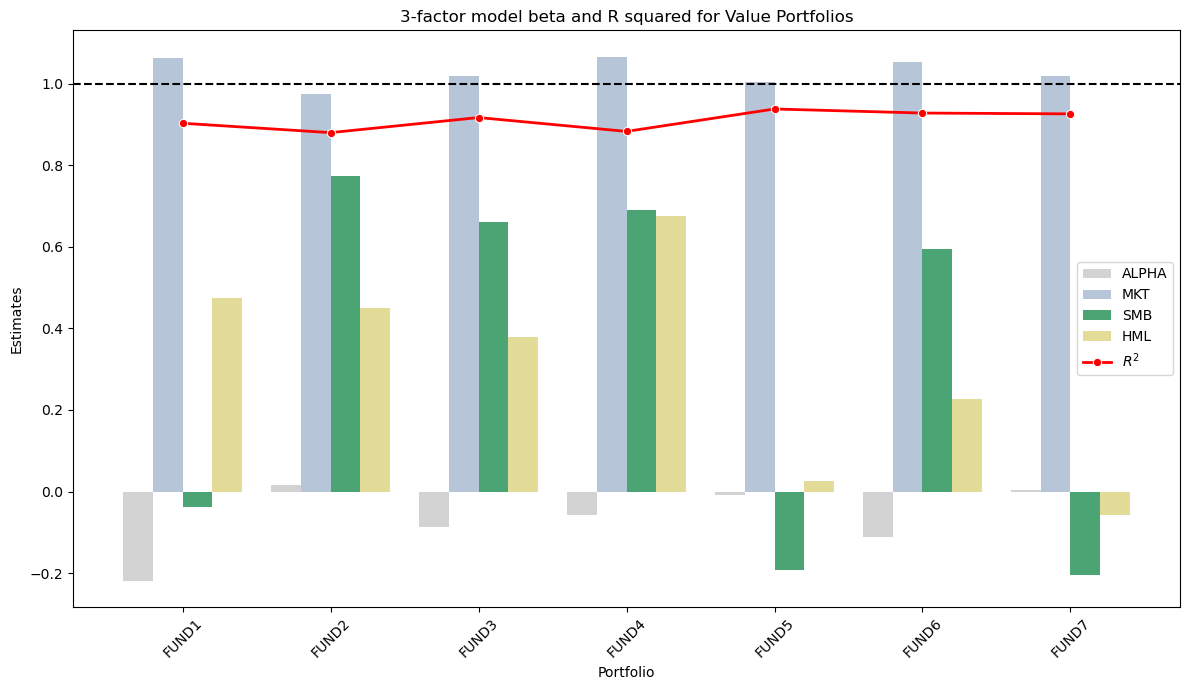

In [78]:
size7_stat_factor = pd.DataFrame({
    'PORT': size7.columns,
    'R squared': factors['Adj_R2'],
    'ALPHA': factors['Alpha'],
    'MKT': factors['MKT'],
    'SMB': factors['SMB'],
    'HML': factors['HML']
})

size7_long_factor = size7_stat_factor.melt(id_vars="PORT", value_vars=['ALPHA', 'MKT','SMB','HML'], var_name="Metric", value_name="Value")

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x='PORT', y='Value', hue='Metric', data=size7_long_factor, palette=['lightgrey', 'lightsteelblue', 'mediumseagreen', 'khaki'])
sns.lineplot(x='PORT', y='R squared',data=size7_stat_factor, color="red", marker="o", linewidth=2,label='$R^2$')

plt.axhline(y=1, linestyle="--", color="black")
plt.title('3-factor model beta and R squared for Value Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Estimates')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Part 5: Based on your estimation results, can you determine the investment style of these funds? Write a short analysis for each fund, discussing its investment style.

+) FUND1 – Large-Cap Value Fund:
High market beta → Strong market exposure,
Large-cap focus (negative SMB), Value-oriented (positive HML),
Negative alpha → Slight underperformance,
Likely invests in established, undervalued companies.

+) FUND2 – Small-Cap Value Fund:
High beta, small-cap tilt (positive SMB), strong value focus (positive HML),
Neutral alpha → Performs as expected,
Likely invests in undervalued small-cap stocks.

+) FUND3 – Small-Cap Value-Leaning Fund:
High beta, small-cap tilt (positive SMB), moderate value orientation (HML),
Neutral alpha → No significant over- or underperformance,
Likely favors small-cap stocks with some value tilt.

+) FUND4 – Small-Cap Deep Value Fund:
High beta, strong small-cap tilt (positive SMB), deep value focus (high HML),
Neutral alpha → Expected performance,
Likely aggressively invests in deeply undervalued small-cap stocks.

+) FUND5 – Large-Cap Growth Fund:
High beta, large-cap focus (negative SMB), growth-oriented (negative HML),
Neutral alpha → No major excess returns,
Likely invests in large, fast-growing companies.

+) FUND6 – Small-Cap Blended Fund:
High beta, small-cap preference (positive SMB), balanced value-growth approach (moderate HML),
Neutral alpha → Expected performance,
Likely holds a mix of small-cap value and growth stocks.

+) FUND7 – Large-Cap Growth Fund:
High beta, large-cap focus (negative SMB), strong growth tilt (negative HML),
Neutral alpha → No significant outperformance,
Likely focuses on large, high-growth stocks (e.g., tech sector).

+)Conclusion:
Large-Cap Funds: FUND1 (value), FUND5 & FUND7 (growth)
Small-Cap Funds: FUND2 & FUND4 (value-heavy), FUND6 (balanced approach), FUND3 (mild value tilt)
Most aggressive value fund: FUND4
Strongest growth-focused fund: FUND7